In [174]:
import numpy as np

In [3]:
from mogutda import SimplicialComplex

torus_sc = [(1,2,4), (4,2,5), (2,3,5), (3,5,6), (5,6,1), (1,6,2), (6,7,2), (7,3,2),
            (1,3,4), (3,4,6), (4,6,7), (4,5,7), (5,7,1), (7,3,1)]
torus_c = SimplicialComplex(simplices=torus_sc)

In [4]:
print(torus_c.betti_number(0))   # print 1
print(torus_c.betti_number(1))   # print 2
print(torus_c.betti_number(2))   # print 1

1
2
1


In [12]:
import random
random.choice(['老大', '87' , '遮城' , '帥哥'])

'87'

In [14]:
np.pi

3.141592653589793

In [124]:
import cv2 as cv
from matplotlib import pyplot as plt

In [125]:
def showrgb(img,t=1):
    b,g,r = cv.split(img)
    img2 = cv.merge([r,g,b])
    if t!=1:
        plt.imshow(img2,interpolation = 'bicubic')
    else:
        plt.imshow(img2)
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

In [154]:
def showgray(img,g=1):
    if g==1:
        plt.imshow(img)
    else:
        plt.imshow(img,cmap='gray')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

In [126]:
img = cv.imread('KP.jpg')

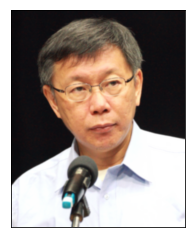

In [127]:
showrgb(img,2)

In [128]:
edges = cv.Canny(img,100,200)

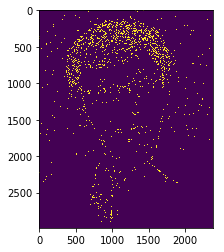

In [129]:
plt.imshow(edges)

In [130]:
room=cv.imread('classroom.jpg')

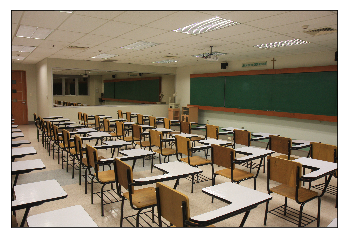

In [142]:
showrgb(room)

In [132]:
edges = cv.Canny(room,30,50)

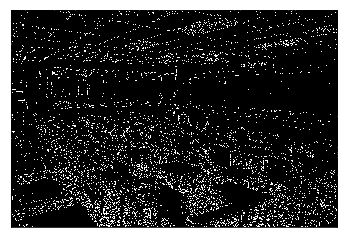

In [133]:
plt.imshow(edges,cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [162]:
gray = cv.cvtColor(room,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

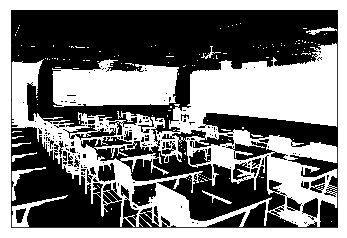

In [135]:
plt.imshow(thresh,cmap='gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [146]:
ori=cv.imread('ori.PNG')

In [151]:
edges = cv.Canny(ori,50,100)

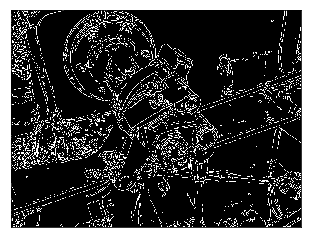

In [156]:
showgray(edges,2)

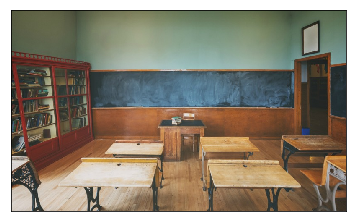

In [182]:
oroom=cv.imread('oclassroom.jpg')
showrgb(oroom)

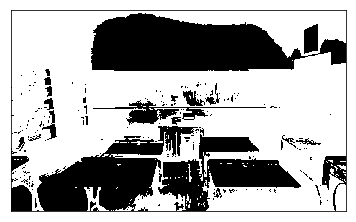

In [183]:
goroom = cv.cvtColor(oroom,cv.COLOR_BGR2GRAY)
ret, tgoroom = cv.threshold(goroom,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
showgray(tgoroom,2)

In [184]:
thresh=tgoroom
img=oroom
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

In [185]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [186]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

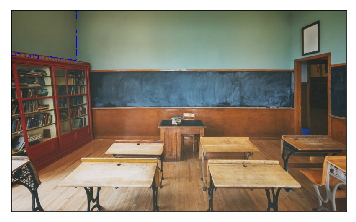

In [181]:
showrgb(img)